In [0]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import os
import seaborn as sns

ModuleNotFoundError: No module named 'pandas'

In [0]:
pd.set_option('display.max_rows',100)

In [0]:
os.getcwd()

'/Users/yoonk/Desktop/ESCfinal/src'

In [0]:
df = pd.read_csv("/Users/yoonk/Desktop/ESCfinal/dataset/imputed.csv")

In [0]:
total_assets = pd.Series(np.exp(df['Attr29']), index=df['Attr29'].index)
assert not bool(total_assets.isnull().sum())

total_equity = df['Attr10']* total_assets
assert not bool(total_equity.isnull().sum())

total_liabilities = total_assets - total_equity
assert not bool(total_liabilities.isnull().sum())

short_term_liabilities =  df['Attr51']  * total_assets
assert not bool(short_term_liabilities.isnull().sum())

long_term_liabilities = total_liabilities - short_term_liabilities
assert not bool(long_term_liabilities.isnull().sum())

total_sales = pd.Series(np.array(short_term_liabilities) * np.array(df['Attr36']))
assert not bool(total_sales.isnull().sum())

sales = total_assets* df['Attr9'].values
assert not bool(sales.isnull().sum())

gross_profit = total_assets * df['Attr18']
assert not bool(gross_profit.isnull().sum())

EBIT = total_assets * df['Attr7']
assert not bool(EBIT.isnull().sum())

EBITDA = total_assets * df['Attr48']
assert not bool(EBITDA.isnull().sum())

retained_earnings = total_assets * df['Attr6']
assert not bool(retained_earnings.isnull().sum())

net_profit = total_assets * df['Attr1']
assert not bool(net_profit.isnull().sum())

working_capital = total_assets * df['Attr3']
profit_on_sales = total_assets * df['Attr35']

working_capital.isnull().sum()
profit_on_sales.isnull().sum()

current_assets = df['Attr50'] * total_liabilities

current_assets.fillna(30.04, inplace=True)
assert not bool(current_assets.isnull().sum())

### EDA- Features that are linearly dependent on other variables are removed by hard

In [0]:
drop_list = []
for i in (15,17,19,20,28,31,34,37,41,42,44,46,55,57,62):
    drop_list.append("Attr" + str(i))
    
df.drop(drop_list, axis=1, inplace=True)


,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr53,Attr54,Attr56,Attr58,Attr59,Attr60,Attr61,Attr63,Attr64,class
0,-0.024558,0.30051,0.107330,1.8368,34.3820,-0.026711,-0.020067,2.251900,1.06670,0.676730,...,0.88530,1.1106,0.062497,0.93750,0.254540,13.6320,3.6930,5.2602,0.8826,0
3,0.119520,0.17679,0.635460,4.5944,117.6500,0.251540,0.148750,4.582600,1.12630,0.810170,...,4.31510,4.3151,0.112110,0.88789,0.000000,8.9302,10.2870,9.0448,8.5169,0
4,0.230400,0.27095,0.237620,2.5745,-26.9280,0.617540,0.282690,2.690700,0.80411,0.729050,...,1.19230,1.3886,0.459570,0.62320,0.164650,7.9274,6.6605,5.3283,1.3150,0
5,0.152550,0.47011,0.018859,1.0406,-39.9980,0.000000,0.152550,1.127200,1.91550,0.529890,...,1.02520,1.0252,0.185450,0.81964,0.000000,10.4360,6.5827,4.1260,3.7058,0
6,0.036332,0.25392,0.420750,3.0936,52.1600,-0.013645,0.037068,2.938200,1.52360,0.746080,...,1.97220,1.9722,0.038584,0.97650,0.000000,7.0818,8.1981,7.5815,4.0276,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6849,0.087092,0.61009,0.169160,1.2773,-20.9500,0.032918,0.088145,0.596690,1.09370,0.364030,...,1.64910,1.6491,0.085704,0.91430,0.000000,5.9854,4.3972,2.3373,6.4597,0
6850,0.013116,0.38184,0.553410,2.4745,4.4530,0.000000,0.013116,1.618900,2.22200,0.618160,...,8.67460,8.6746,0.337940,0.98895,0.000000,4.2910,5.5285,5.9202,31.1820,0
6851,0.016512,0.84426,0.062203,1.0870,3.8038,0.000000,0.023435,0.184470,2.14320,0.155740,...,0.69949,1.0462,0.016824,0.98912,0.495710,52.7080,3.9611,2.9968,9.6258,0
6852,-0.160010,0.98115,0.349120,1.5797,48.3620,-0.699530,-0.160010,0.019217,2.18830,0.018855,...,0.38750,7.7566,-0.037914,1.07190,19.017000,63.6470,2.5009,3.6336,44.9730,0


In [0]:
print("The shape of the dataset "+ str(df.shape))

The shape of the dataset (6855, 50)


In [0]:
for i in range(0, 6836):
    if short_term_liabilities[i] == 0:
        short_term_liabilities[i] += short_term_liabilities[i]+(1e-9)
        
for i in range(0, 6836):
    if sales[i] == 0:
        sales[i] += sales[i]+(1e-9)
        
for i in range(0, 6836):
    if total_liabilities[i] == 0:
        total_liabilities[i] += total_liabilities[i]+(1e-9)
        
for i in range(0, 6836):
    if total_equity[i] == 0:
        total_equity[i] += total_equity[i]+(1e-9)
        

for i in range(0,6836):
    if df.loc[i,'Attr12'] != float('NaN'):
        df.loc[i,'Attr12'] = gross_profit[i] / short_term_liabilities[i]

for i in range(0,6836):
    if df.loc[i,'Attr23'] != float('NaN'):
        df.loc[i,'Attr23'] = net_profit[i] / sales[i]

for i in range(0,6836):
    if df.loc[i,'Attr39'] != float('NaN'):
        df.loc[i,'Attr39'] = profit_on_sales[i] / sales[i]

for i in range(0,6836):
    if df.loc[i,'Attr49'] != float('NaN'):
        df.loc[i,'Attr49'] = EBITDA[i] / sales[i]

for i in range(0,6836):
    if df.loc[i,'Attr50'] != float('NaN'):
        df.loc[i,'Attr50'] = current_assets[i] / total_liabilities[i]

for i in range(0,6836):
    if df.loc[i,'Attr59'] != float('NaN'):
        df.loc[i,'Attr59'] = long_term_liabilities[i] / total_equity[i]

for i in range(0,6836):
    if df.loc[i,'Attr63'] != float('NaN'):
        df.loc[i,'Attr63'] = sales[i] / short_term_liabilities[i]

In [0]:
print("Missing Values Profile")
print(df.isnull().sum())

Missing Values Profile
Attr1       0
Attr2       0
Attr3       0
Attr4      28
Attr5      15
Attr6       0
Attr7       0
Attr8      15
Attr9       0
Attr10      0
Attr11      0
Attr12      0
Attr13     14
Attr14      0
Attr16     15
Attr18      0
Attr21    112
Attr22      0
Attr23      0
Attr24    149
Attr25      0
Attr26     15
Attr27    462
Attr29      0
Attr30     14
Attr32     72
Attr33     28
Attr35      0
Attr36      0
Attr38      0
Attr39      0
Attr40     28
Attr43     14
Attr45    418
Attr47     57
Attr48      0
Attr49      0
Attr50      0
Attr51      0
Attr52     60
Attr53    162
Attr54    162
Attr56     14
Attr58     10
Attr59      0
Attr60    420
Attr61     20
Attr63      0
Attr64    162
class       0
dtype: int64


In [0]:
df.groupby('class').mean()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr52,Attr53,Attr54,Attr56,Attr58,Attr59,Attr60,Attr61,Attr63,Attr64
class,,,,,,,,,,,,,,,,,,,,,
0,0.050783,0.522274,0.196841,8.953455,160.332269,0.037713,0.068527,13.717569,1.965256,0.464445,...,0.747670,6.053805,7.715184,-0.316139,1.134600,9.470525e-01,138.907395,31.716445,8.905184e+08,35.839259
1,-0.056242,0.902775,-0.046100,2.916262,-95.134598,-0.382313,-0.046120,1.841167,2.121042,0.080358,...,0.844518,3.965881,5.579409,-21.117094,1.220848,1.273758e+06,44.277517,24.720735,5.630698e+00,42.930342


### Removing Outliers

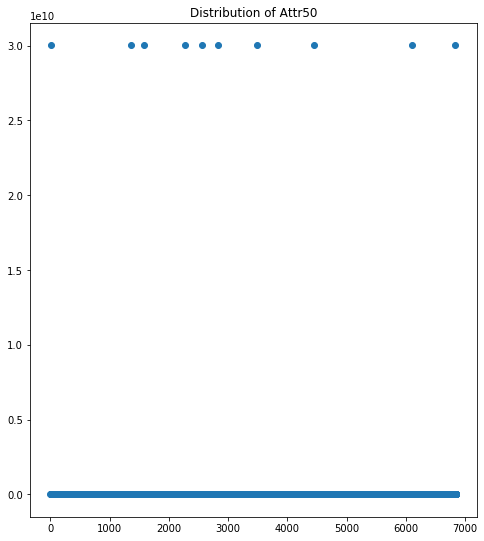

In [0]:
cols_to_use = ['Attr50']
fig = plt.figure(figsize=(8, 20))
plot_count = 0
for col in cols_to_use:
    plot_count += 1
    plt.subplot(2, 1, plot_count)
    plt.scatter(range(df.shape[0]), df[col].values)
    plt.title("Distribution of "+col)
plt.show()


<ipython-input-30-f764ad135331>:2: RuntimeWarning: invalid value encountered in log
  sns.distplot(np.log(df['Attr45'].dropna().replace(0, 1e-9).values))


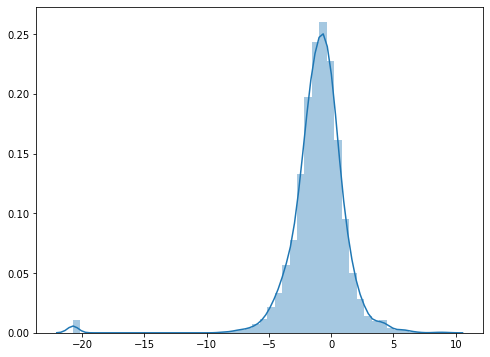

In [0]:
fig = plt.figure(figsize = (8,6))
sns.distplot(np.log(df['Attr45'].dropna().replace(0, 1e-9).values))
plt.show()

In [0]:
dropList = {2555,2099,4994,1458,3074,1593,5377,423,1207,1934,1593}
print(dropList)

{5377, 4994, 3074, 423, 1934, 1458, 2099, 1207, 1593, 2555}


In [0]:
list(dropList)
df.drop(dropList)

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr53,Attr54,Attr56,Attr58,Attr59,Attr60,Attr61,Attr63,Attr64,class
0,-0.024558,0.30051,0.107330,1.8368,34.3820,-0.026711,-0.020067,2.251900,1.06670,0.676730,...,0.88530,1.1106,0.062497,0.93750,0.288165,13.6320,3.6930,8.316700e+00,0.8826,0
1,0.639180,0.00000,1.000000,NaN,29.6780,-1.139300,0.760520,NaN,1.11850,1.000000,...,NaN,NaN,0.679830,0.32014,0.000000,NaN,37.8860,3.795395e+09,NaN,0
2,-0.440760,0.47723,0.192600,1.4678,34.5550,0.000000,-0.440760,1.095400,1.51860,0.522770,...,1.32110,1.4867,-0.290590,1.28710,0.125371,NaN,2.5649,3.688698e+00,3.8376,0
3,0.119520,0.17679,0.635460,4.5944,117.6500,0.251540,0.148750,4.582600,1.12630,0.810170,...,4.31510,4.3151,0.112110,0.88789,0.016095,8.9302,10.2870,6.370835e+00,8.5169,0
4,0.230400,0.27095,0.237620,2.5745,-26.9280,0.617540,0.282690,2.690700,0.80411,0.729050,...,1.19230,1.3886,0.459570,0.62320,0.164653,7.9274,6.6605,5.328408e+00,1.3150,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6850,0.013116,0.38184,0.553410,2.4745,4.4530,0.000000,0.013116,1.618900,2.22200,0.618160,...,8.67460,8.6746,0.337940,0.98895,0.000000,4.2910,5.5285,5.920200e+00,31.1820,0
6851,0.016512,0.84426,0.062203,1.0870,3.8038,0.000000,0.023435,0.184470,2.14320,0.155740,...,0.69949,1.0462,0.016824,0.98912,0.495710,52.7080,3.9611,2.996800e+00,9.6258,0
6852,-0.160010,0.98115,0.349120,1.5797,48.3620,-0.699530,-0.160010,0.019217,2.18830,0.018855,...,0.38750,7.7566,-0.037914,1.07190,19.017000,63.6470,2.5009,3.633600e+00,44.9730,0
6853,0.108750,0.46977,0.202730,1.5752,-7.4427,0.108750,0.142110,1.093100,1.11740,0.513510,...,1.15450,1.4183,0.105080,0.89492,0.228510,6.1431,4.5881,3.857500e+00,3.0564,1


In [0]:
df1 = df.copy()

In [0]:
df1.describe()

,Attr1,Attr2,Attr3,Attr4,Attr5,Attr6,Attr7,Attr8,Attr9,Attr10,...,Attr53,Attr54,Attr56,Attr58,Attr59,Attr60,Attr61,Attr63,Attr64,class
count,6855.000000,6855.000000,6855.000000,6827.000000,6.840000e+03,6855.000000,6855.000000,6840.000000,6855.000000,6855.000000,...,6693.000000,6693.000000,6841.000000,6845.000000,6.855000e+03,6435.000000,6835.000000,6.855000e+03,6693.000000,6855.000000
mean,0.045147,0.542312,0.184047,8.635103,1.468493e+02,0.015594,0.062490,13.090759,1.973460,0.444218,...,5.947740,7.606688,-1.410766,1.139148,6.707992e+04,134.157519,31.347981,8.436217e+08,36.199481,0.052662
std,0.288025,0.812422,0.595471,332.588711,1.371958e+04,5.594969,0.551398,416.696896,21.103823,0.832917,...,94.161096,166.437594,92.019612,8.990390,5.553801e+06,3816.554508,1313.459502,5.756071e+10,503.841506,0.223375
min,-12.458000,0.000000,-15.487000,-0.045319,-2.289900e+05,-117.420000,-12.458000,-0.975060,-0.032371,-39.156000,...,-1033.700000,-1033.700000,-7522.100000,-30.892000,-3.005460e+02,0.000000,-0.003150,-3.772763e+09,-0.000015,0.000000
25%,0.001533,0.263575,0.019156,1.043250,-5.145200e+01,-0.000352,0.002964,0.429405,1.007600,0.295665,...,0.685430,0.948680,0.004035,0.882100,1.896661e-03,5.403450,4.237000,2.542919e+00,2.010100,0.000000
50%,0.041770,0.466170,0.197270,1.585500,0.000000e+00,0.000000,0.049108,1.093100,1.162100,0.511400,...,1.208400,1.374700,0.044881,0.956220,8.760692e-02,9.564500,6.253400,4.265728e+00,4.012300,0.000000
75%,0.112150,0.689695,0.409500,2.868450,5.541500e+01,0.062237,0.127590,2.684200,1.962050,0.714220,...,2.240700,2.380800,0.119810,0.995600,3.813726e-01,19.606000,9.833750,7.831434e+00,9.086200,0.000000
max,9.803700,40.157000,22.769000,27146.000000,1.034100e+06,322.200000,38.618000,27145.000000,1704.800000,12.602000,...,4784.100000,11678.000000,112.020000,668.750000,4.598266e+08,251570.000000,108000.000000,4.756116e+12,21153.000000,1.000000


### Imputation
1. simple(median/ mean)
2. knn
3. Dicision Tree
4. Random Forest
5. 

(6855, 50)
(5724, 49)
Score with the na dropped dataset is 0.03265498365964166


/Users/yoonk/opt/anaconda3/envs/xgboost/lib/python3.8/site-packages/sklearn/impute/_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"
/Users/yoonk/opt/anaconda3/envs/xgboost/lib/python3.8/site-packages/sklearn/impute/_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"
/Users/yoonk/opt/anaconda3/envs/xgboost/lib/python3.8/site-packages/sklearn/impute/_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"
/Users/yoonk/opt/anaconda3/envs/xgboost/lib/python3.8/site-packages/sklearn/impute/_iterative.py:669: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn("[IterativeImputer] Early stopping criterion not"
/Users/yoonk/opt/ana

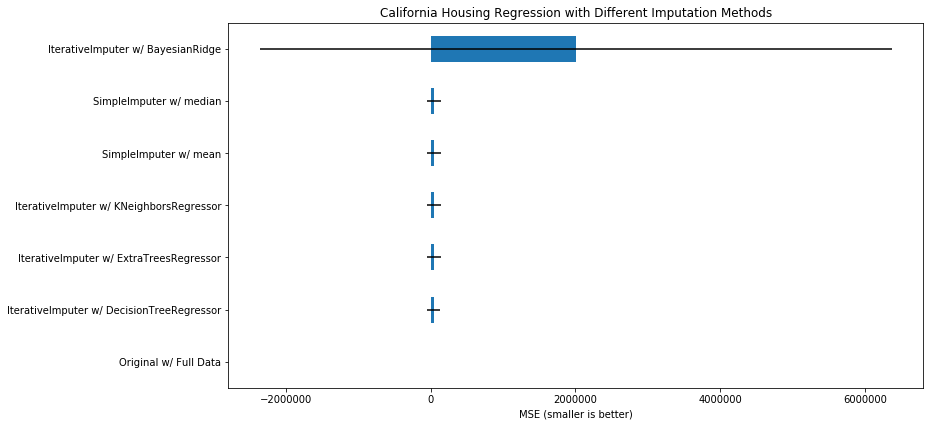

In [0]:
from sklearn.ensemble import RandomForestRegressor 
# using sklearn.ensemble.ExtraTreesRegressor could be faster
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer, SimpleImputer, KNNImputer
# contains BaysianRidge DecisionTreeRegressor ExtraTreesRegressor KNeighborsRegressor
from sklearn.linear_model import BayesianRidge
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
N_SPLITS = 5
rng = np.random.RandomState(0)
print(df1.shape)
estimator = RandomForestRegressor(random_state = 0, n_estimators = 100)
na_dropped = df1.dropna(axis = 0)
print(X_full.shape)
X_full = na_dropped.iloc[:,:-1]
y_full = na_dropped['class']
score = cross_val_score(estimator, X_full, y_full).mean()
print(f"Score with the na dropped dataset is {score}")

br_estimator=  BayesianRidge()
score_full_data = pd.DataFrame(cross_val_score(br_estimator, X_full,y_full,scoring = 'neg_mean_squared_error',
                                               cv = N_SPLITS),columns = ['Full Data'])



X_missing = df.iloc[:,:-1]
y_missing = df['class']

estimators = [
    BayesianRidge(),
    DecisionTreeRegressor(max_features='sqrt', random_state=0),
    ExtraTreesRegressor(n_estimators=10, random_state=0),
    KNeighborsRegressor(n_neighbors=15)
]
score_iterative_imputer = pd.DataFrame()
for impute_estimator in estimators:
    estimator = make_pipeline(
        IterativeImputer(random_state=0, estimator=impute_estimator),
        br_estimator
    )
    score_iterative_imputer[impute_estimator.__class__.__name__] = \
        cross_val_score(
            estimator, X_missing, y_missing, scoring='neg_mean_squared_error',
            cv=N_SPLITS
        )


score_simple_imputer = pd.DataFrame()
for strategy in ['mean','median']:
    estimator = make_pipeline(
    SimpleImputer(missing_values = np.nan, strategy = strategy),
    br_estimator)
    score_simple_imputer[strategy] = cross_val_score(estimator,X_missing, y_missing, scoring = 'neg_mean_squared_error', cv = N_SPLITS)

    
    

In [0]:
dt = DecisionTreeRegressor(max_features = 'sqrt',random_state=0)
final_estimator = IterativeImputer(random_state=0, estimator = dt)
imputed = final_estimator.fit_transform(X_missing)
df_imputed = np.vstack((imputed.T, y_missing))
df_imputed = df_imputed.T
df_imputed = pd.DataFrame(data= df_imputed, columns = ['net profit / total assets',
'total liabilities / total assets',
'working capital / total assets',
'current assets / short-term liabilities',
'[(cash + short-term securities + receivables - short-term liabilities) / (operating expenses - depreciation)] * 365',
'retained earnings / total assets',
'EBIT / total assets',
'book value of equity / total liabilities',
'sales / total assets',
'equity / total assets',
'(gross profit + extraordinary items + financial expenses) / total assets',
'gross profit / short-term liabilities',
'(gross profit + depreciation) / sales',
'(gross profit + interest) / total assets',
'(gross profit + depreciation) / total liabilities',
'sales (n) / sales (n-1)',
'profit on operating activities / total assets',
'net profit / sales',
'gross profit (in 3 years) / total assets',
'(equity - share capital) / total assets',
'(net profit + depreciation) / total liabilities',
'profit on operating activities / financial expenses',
'working capital / fixed assets',
'logarithm of total assets',
'(total liabilities - cash) / sales',
'(current liabilities * 365) / cost of products sold',
'operating expenses / short-term liabilities',
'profit on sales / total assets',
'total sales / total assets',
'constant capital / total assets',
'profit on sales / sales',
'(current assets - inventory - receivables) / short-term liabilities',
'rotation receivables + inventory turnover in days',
'net profit / inventory',
'(inventory * 365) / cost of products sold',
'EBITDA (profit on operating activities - depreciation) / total assets',
'EBITDA (profit on operating activities - depreciation) / sales',
'X50 current assets / total liabilities',
'short-term liabilities / total assets',
'(short-term liabilities * 365) / cost of products sold)',
'equity / fixed assets',
'constant capital / fixed assets',
'(sales - cost of products sold) / sales',
'total costs /total sales',
'long-term liabilities / equity',
'sales / inventory',
'sales / receivables',
'sales / short-term liabilities',
'sales / fixed assets',
'class'    
])
df_imputed.to_csv("imputed.csv",index = False)

In [0]:

scores = pd.concat(
    [score_full_data, score_simple_imputer, score_iterative_imputer],
    keys=['Original', 'SimpleImputer', 'IterativeImputer'], axis=1
)
print(scores.mean().sort_values(ascending = False))

Original          Full Data               -3.079032e+00
IterativeImputer  DecisionTreeRegressor   -3.889985e+04
                  ExtraTreesRegressor     -4.254458e+04
                  KNeighborsRegressor     -4.478036e+04
SimpleImputer     mean                    -4.489964e+04
                  median                  -4.534338e+04
IterativeImputer  BayesianRidge           -2.005919e+06
dtype: float64


#### 결측치가 없는 데이터에 bayesian regressiong을 한 것과 비교해보아, 결측가 있는 데이터에 가장 낮은 mse를 보인 것은 decision tree, random tree, knn 순서였다.
#### 해당하는 변수의 평균과 중위값만 고려한 계산법이 오히려 bayesian ridge보다 성능이 월등히 좋았다
#### 따라서 결측치를 채우기 위해 Decision Tree를 사용할 것이다

## Model : Feature extraction with FA and classification using XGboost

In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [4]:
df = pd.read_csv('/content/imputed_final.csv')
df.head(3)
print(df.shape)

(6835, 43)


### Measures for Highly Imbalanced Dataset
#### 1. Oversample the minority class (SMOTE etc.)
#### 2. Undersample the majority class
#### 3. Use class_weight kind of parameters provided within several ML libraries 

Number of observations for BANKRUPT companies(1's): 361
Number of observations for HEALTHY companies(0's): 6474


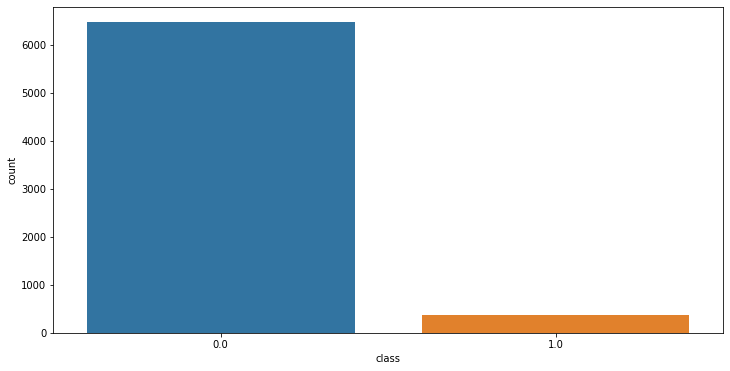

In [8]:
num_zeros = 0
for num in df['class']:
       if num == 0:
              num_zeros = num_zeros+1
num_ones = len(df) - num_zeros 

print("Number of observations for BANKRUPT companies(1's):",num_ones)
print("Number of observations for HEALTHY companies(0's):",num_zeros)
fig = plt.figure(figsize=(12, 6))
sns.countplot(x='class', data=df)
plt.show()

In [10]:
# upsampling minority class
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = df[df.loc[:,'class']==0]
df_minority = df[df.loc[:,'class']==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=6494,    # to match majority class
                                 random_state=5) # reproducible results
# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
df_upsampled.loc[:,'class'].value_counts()

1.0    6494
0.0    6474
Name: class, dtype: int64

In [0]:
y_up = df_upsampled.loc[:,'class']
X_up = df_upsampled.drop('class', axis=1)

In [0]:
# # Downsampling majority class
# df_majority_downsampled = resample(df_majority, 
#                                  replace=False,    # sample without replacement
#                                  n_samples=361,     # to match minority class
#                                  random_state=12) # reproducible results
 
# # Combine minority class with downsampled majority class
# df_downsampled = pd.concat([df_majority_downsampled, df_minority])
 
# # Display new class counts
# df_downsampled.loc[:,'class'].value_counts()

In [0]:
# y_down = df_downsampled.loc[:,'class']
# X_down = df_downsampled.drop('class', axis=1)

### Classification Models
#### CART, Bagging NN, AdaBoost, Gradient Boost, Random Forest

### Classification Metrics
#### confusion_matrix, accuracy_score , recall_score , precision_score, f1_score, roc_curve,roc_auc_score

### Random Forest Classifier(Bagging)

### Gradient Boost Classifier(Boosting)

In [0]:
import tensorflow as tf
import numpy as np
from sklearn import pipeline
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import f1_score, make_scorer, precision_recall_curve, precision_score, recall_score
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import warnings
from datetime import datetime
from sklearn.decomposition import PCA, TruncatedSVD
import random
import math
from scipy import stats
import xgboost as xgb
from sklearn.model_selection import train_test_split
import time
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import warnings
from sklearn.exceptions import DataConversionWarning
warnings.filterwarnings(action='ignore', category=DataConversionWarning)


seed = 5
tf.random.set_seed(seed)
np.random.seed(seed)

In [0]:
# X_train, X_test, y_train, y_test = train_test_split(X_down, y_down, test_size= 0.3, random_state= 1234)
X_train, X_test, y_train, y_test = train_test_split(X_up, y_up, test_size= 0.3, random_state= 1234)


In [0]:
pipelines = {
    "rf": pipeline.make_pipeline(StandardScaler(), RandomForestClassifier(random_state=5)),
    "gb": pipeline.make_pipeline(StandardScaler(), GradientBoostingClassifier(random_state=5))
}

In [0]:
## 여기가 hyper parameter tuning!!!!!!!
rf_hyperparameters = {
    "randomforestclassifier__n_estimators": [100, 200],
    "randomforestclassifier__max_features": ["auto", "sqrt", 0.33]
}
gb_hyperparameters = {
    "gradientboostingclassifier__n_estimators": [100, 200],
    'gradientboostingclassifier__learning_rate': [0.05, 0.1, 0.2],
    'gradientboostingclassifier__max_depth': [1, 3, 5]
}

hyperparameters = {"rf": rf_hyperparameters,
                   "gb": gb_hyperparameters
                  }

In [0]:
# Create empty dictionary called fitted_models
fitted_models = {}

# Loop through model pipelines, tuning each one and saving it to fitted_models
for name, pipeline in pipelines.items():
    # Create cross-validation object from pipeline and hyperparameters
    model = GridSearchCV(pipeline, hyperparameters[name], cv= 10, n_jobs= -1)
    
    # Fit model on X_train, y_train
    model.fit(X_train, y_train)
    
    # Store model in fitted_models[name] 
    fitted_models[name] = model
    
    # Print '{name} has been fitted'
    print(name, 'has been fitted.')

In [0]:
for name, model in fitted_models.items():
    print(name, model.best_score_)

In [0]:
for name, model in fitted_models.items():
    print(name)
    print("-----------")
    pred = model.predict(X_test)
    print('Acc:', accuracy_score(y_test, pred))
    print("cm:\n", confusion_matrix(y_test, pred))


In [0]:
with open('final_model_randomForest.pkl', 'wb') as f:
    pickle.dump(fitted_models['rf'].best_estimator_, f)
with open('final_model_GradientBoost.pkl', 'wb') as f:
    pickle.dump(fitted_models['gb'].best_estimator_, f)    
        

### Extra Gradient Boosting (XG Boost)

In [0]:
D_train = xgb.DMatrix(X_train, label=y_train)
D_test = xgb.DMatrix(X_test, label=y_test)
steps = 10
xgb_hyperparameters = {
    'eta': 0.3, # shrinkage parameter for regularization
    'max_depth': 3,  
    'objective': 'binary:logistic',  
    'num_class': 2,
    'subsample' : 0.5,
    'eval_metric' = 'auc',
    'seed' = 123} 
model = xgb.train(xgb_hyperparameters, D_train, steps)

In [0]:
# Evaluating XGBoost
preds = model.predict(D_test)
best_preds = np.asarray([np.argmax(line) for line in preds])

print("Precision = {}".format(precision_score(Y_test, best_preds, average='macro')))
print("Recall = {}".format(recall_score(Y_test, best_preds, average='macro')))
print("Accuracy = {}".format(accuracy_score(Y_test, best_preds)))

In [0]:
# Finetuning parameters
from sklearn.model_selection import GridSearchCV

clf = xgb.XGBClassifier()
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

grid = GridSearchCV(clf,
                    parameters, n_jobs=4,
                    scoring="neg_log_loss",
                    cv=3)

grid.fit(X_train, y_train)

with open('final_model_xgboost.pkl', 'wb') as f:
    pickle.dump(grid, f)
    
# load model
# loaded_model = pickle.load(open("final_model_xgboost.pkl", "rb"))

y_pred = grid.predict(X_test)
predictions = [round(value) for value in y_pred]